C:\Users\HP\AppData\Local\Temp\ipykernel_24276\828489376.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(response.text, "html.parser")



=== PageRank Results ===
https://www.python.org/psf/                                  : 0.00697
https://docs.python.org                                      : 0.00697
https://pypi.org/                                            : 0.00697
https://psfmember.org/civicrm/contribute/transact?reset=1&id=2 : 0.00697
https://www.linkedin.com/company/python-software-foundation/ : 0.00697
https://fosstodon.org/@ThePSF                                : 0.00697
https://twitter.com/ThePSF                                   : 0.00697
http://brochure.getpython.info/                              : 0.00697
https://docs.python.org/3/license.html                       : 0.00697
https://wiki.python.org/moin/BeginnersGuide                  : 0.00697
https://devguide.python.org/                                 : 0.00697
https://docs.python.org/faq/                                 : 0.00697
https://python-docs-translations.github.io/dashboard/        : 0.00697
https://peps.python.org                          

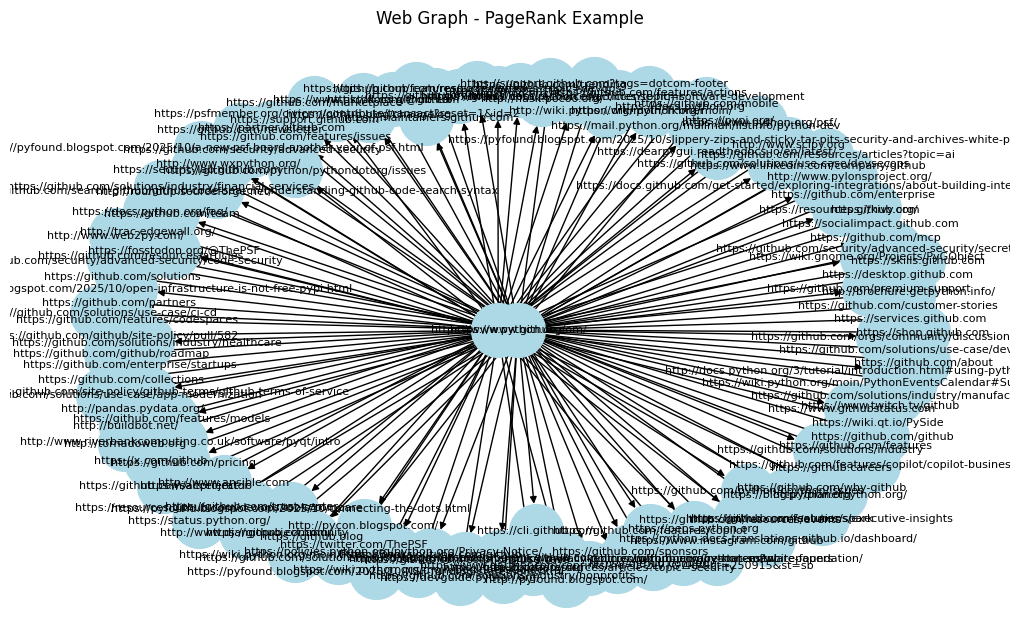

In [2]:
import requests
from bs4 import BeautifulSoup
import networkx as nx

# Example seed URLs
urls = [
    "https://www.wikipedia.org/",
    "https://www.python.org/",
    "https://www.github.com/"
]

# Create a directed graph
G = nx.DiGraph()

# Crawl and extract links
for url in urls:
    try:
        response = requests.get(url, timeout=5)
        soup = BeautifulSoup(response.text, "html.parser")
        links = [a['href'] for a in soup.find_all('a', href=True) if a['href'].startswith('http')]
        for link in links:
            G.add_edge(url, link)
    except Exception as e:
        print(f"Error fetching {url}: {e}")

# Compute PageRank
pagerank_scores = nx.pagerank(G)

# Display results
print("\n=== PageRank Results ===")
for page, score in sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{page:60s} : {score:.5f}")

# Visualize (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
nx.draw(G, with_labels=True, node_size=1500, node_color='lightblue', font_size=8)
plt.title("Web Graph - PageRank Example")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_24276\3197617345.py:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(response.text, "html.parser")



=== PageRank Results ===
https://www.python.org/psf/                                  : 0.08540
https://docs.python.org                                      : 0.08540
https://pypi.org/                                            : 0.08540
https://psfmember.org/civicrm/contribute/transact?reset=1&id=2 : 0.08540
https://www.linkedin.com/company/python-software-foundation/ : 0.08540
https://github.com/features/copilot                          : 0.08540
https://github.com/features/spark                            : 0.08540
https://github.com/features/models                           : 0.08540
https://github.com/mcp                                       : 0.08540
https://github.com/features/actions                          : 0.08540
https://www.python.org/                                      : 0.07299
https://www.github.com/                                      : 0.07299


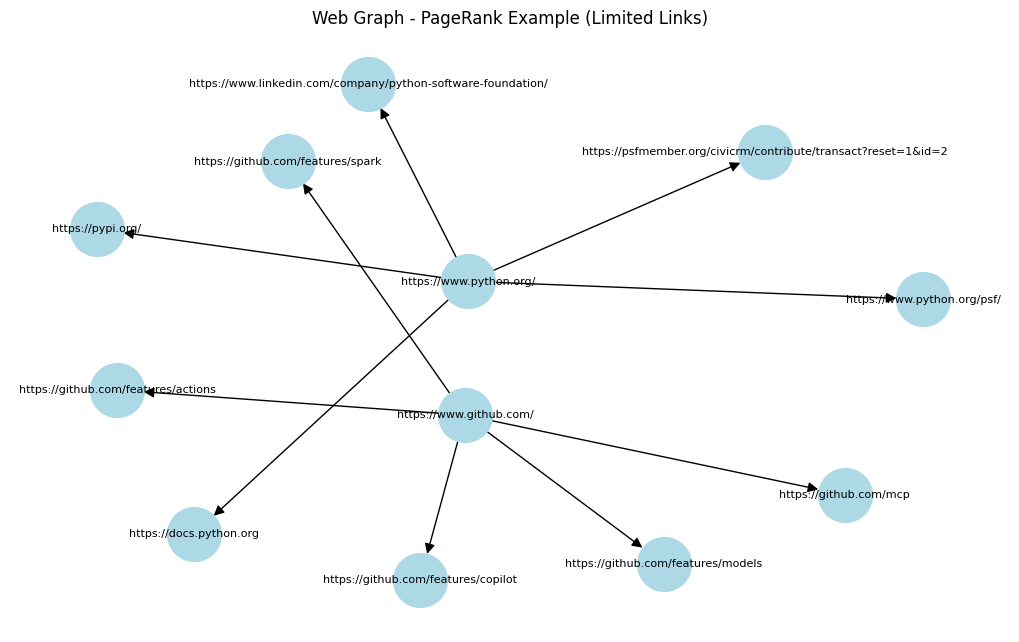

In [3]:
import requests
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt

# Example seed URLs
urls = [
    "https://www.wikipedia.org/",
    "https://www.python.org/",
    "https://www.github.com/"
]

# Create a directed graph
G = nx.DiGraph()
MAX_LINKS_PER_PAGE = 5  # limit number of links per page

# Crawl and extract links
for url in urls:
    try:
        response = requests.get(url, timeout=5)
        soup = BeautifulSoup(response.text, "html.parser")
        links = [a['href'] for a in soup.find_all('a', href=True) if a['href'].startswith('http')]
        links = links[:MAX_LINKS_PER_PAGE]  # take only first few links
        for link in links:
            G.add_edge(url, link)
    except Exception as e:
        print(f"Error fetching {url}: {e}")

# Compute PageRank
pagerank_scores = nx.pagerank(G)

# Display results
print("\n=== PageRank Results ===")
for page, score in sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{page:60s} : {score:.5f}")

# Visualize (less congested)
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, seed=42)  # more readable layout
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', font_size=8, arrowsize=15)
plt.title("Web Graph - PageRank Example (Limited Links)")
plt.show()
